# Part 1: Initial Planning

## Robert, Dave and Stan
--------------------------------------------------------------------------------------------------------------------------------


### We hope to predict the winner of the 2018 NBA Playoffs 
### Collected data from 
  1. https://www.cbssports.com/nba/standings 
  2. https://www.kaggle.com/pablote/nba-enhanced-stats 
  3. https://stats.nba.com/teams/traditional/?sort=W_PCT&dir=-1&Season=2017-18&SeasonType=Regular%20Season 
                       

Import necessary libraries 

In [23]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import math

Read box statistics from 2016/2017 season and 2017/2018
  * Note that these are not yet used

In [24]:
team_box1617 = pd.read_csv("./2016-17_teamBoxScore.csv", sep=',', dtype = str)
player_box1617 = pd.read_csv("./2016-17_playerBoxScore.csv", sep=',', dtype = str)
official_box1617 = pd.read_csv("./2016-17_officialBoxScore.csv", sep=',', dtype = str)
standings1617 = pd.read_csv("./2016-17_standings.csv", sep=',', dtype = str)
team_box1718 = pd.read_csv("./2017-18_teamBoxScore.csv", sep=',', dtype = str)
player_box1718 = pd.read_csv("./2017-18_playerBoxScore.csv", sep=',', dtype = str)
official_box1718 = pd.read_csv("./2017-18_officialBoxScore.csv", sep=',', dtype = str)
standings1718 = pd.read_csv("./2017-18_standings.csv", sep=',', dtype = str)

Read csv file that has been scraped from cite 1.

In [25]:
'''This code readings the recent years team statistics from the scraped web csv. Oddly, the data downloaded with an 
extra column that had no data that we wanted to collect. In orfer to remove this column, its deleted. It was also necessary
to remove the two columns with extra titles and conferences for the following teams. Thus, they are dropped.'''

names = ["Team", "W", "L", 'Pct', 'GB', 'Home', 'Road', "Conf", "Div", "Streak", "L10", "?"]
team_statistics = pd.read_csv("./scraping_attempt2.csv", sep = ',', dtype = str, names = names)
del team_statistics['?']
team_statistics.drop(0, inplace=True)
team_statistics.drop(16, inplace=True)
#team_statistics

Read csv files from end of year statistsics from the past 4 years

In [26]:
team_stats1415 = pd.read_csv("./Stats_14-15.csv", sep = ",")
team_stats1516 = pd.read_csv("./Stats_15-16.csv", sep = ",")
team_stats1617 = pd.read_csv("./Stats_16-17.csv", sep = ",")
team_stats1718 = pd.read_csv("./Stats_17-18.csv", sep = ",")

In [27]:
'''GENERATES MISSING GAMES PLAYED COLUMN'''
team_stats1415['GP'] = team_stats1415['W'] + team_stats1415['L']
team_stats1516['GP'] = team_stats1516['W'] + team_stats1516['L']
team_stats1617['GP'] = team_stats1617['W'] + team_stats1617['L']
team_stats1718['GP'] = team_stats1718['W'] + team_stats1718['L']

In [28]:
'''DELETES USELESS "MIN" COLUMN... JUST NaN FOR ALL'''
del team_stats1415["MIN"]
del team_stats1516["MIN"]
del team_stats1617["MIN"]
del team_stats1718["MIN"]

In [29]:
'''GENERATES DATAFRAMES OF TEAMS WITH WIN% OVER 60%'''
top_teams1415 = team_stats1415[team_stats1415["WIN%"] > .6]
top_teams1516 = team_stats1516[team_stats1516["WIN%"] > .6]
top_teams1617 = team_stats1516[team_stats1617["WIN%"] > .6]
top_teams1718 = team_stats1516[team_stats1718["WIN%"] > .6]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [60]:
'''TRIMS COLUMNS OF TOP TEAMS TO FOCUS ON "TEAM", "W", "L", "WIN%", "PTS"'''
top_team_stats_1415 = top_teams1415[["TEAM", "W", "L", "WIN%", "PTS"]]
top_team_stats_1516 = top_teams1516[["TEAM", "W", "L", "WIN%", "PTS"]]
top_team_stats_1617 = top_teams1617[["TEAM", "W", "L", "WIN%", "PTS"]]
top_team_stats_1718 = top_teams1718[["TEAM", "W", "L", "WIN%", "PTS"]]

Scatter plot for WIN% VS 3PM in regular season
Clearly the teams made really low 3-pointers having low win%
However, above the certain line, 3-pointers obviously was not the only critical factor affecting win%.

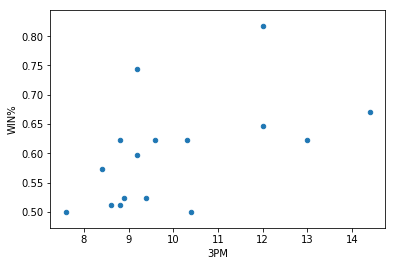

In [74]:
'''THIS BUILDS THE SCATTER PLOT SHOWING 3-POINTERS MADE AND WIN %'''
scat_1617 = team_stats1617[["TEAM", "WIN%", "3PM"]]
scat_1617.plot(x='3PM', y='WIN%', kind='scatter')

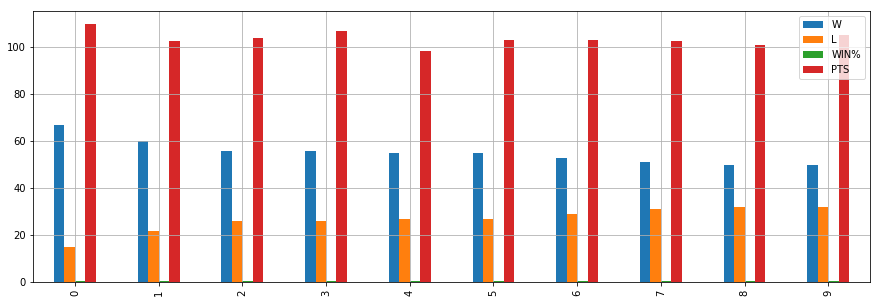

In [75]:
'''THIS PLOTS TEAMS WITH WIN% > 60%'''
top_team_stats_1415.plot(figsize = (15, 5), kind="bar", grid = True)

In [78]:
'''THIS IS TO PLOT THE 2017 FINALS STATS'''
gs_1617 = team_stats1617[team_stats1617['TEAM'] == 'Golden_State_Warriors']
cc_1617 = team_stats1617[team_stats1617['TEAM'] == 'Cleveland_Cavaliers']
frames = [gs_1617, cc_1617]
finals_1617 = pd.concat(frames)
finals_1617
# finals_1617["Win%_*_100"] = finals_1617["WIN%"] * 100
# finals_stats_1617 = finals_1617[["TEAM","Win%_*_100", "PTS", "FGM", "FGA", "3PM", "3PA"]]
# finals_stats_1617.plot(figsize = (15, 5), kind="bar", grid = True)

,TEAM,GP,W,L,WIN%,PTS,FGM,FGA,FG%,3PM,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PLUS/MINUS
0,Golden_State_Warriors,82,67,15,0.817,115.9,43.1,87.1,49.5,12.0,...,35.0,44.4,30.4,14.8,9.6,6.8,3.8,19.3,19.4,11.6
6,Cleveland_Cavaliers,82,51,31,0.622,110.3,39.9,84.9,47.0,13.0,...,34.4,43.7,22.7,13.7,6.6,4.0,4.3,18.1,20.6,3.2


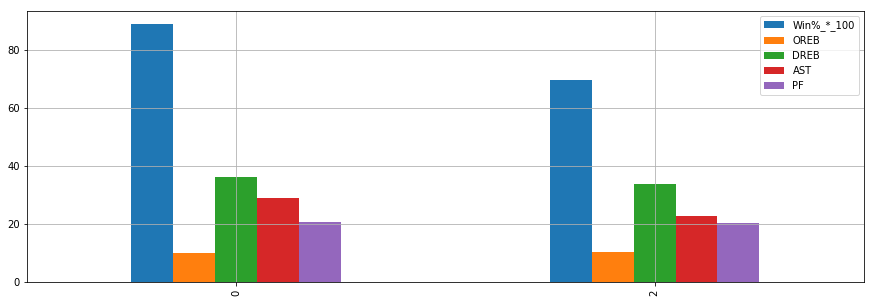

In [80]:
'''THIS IS TO PLOT THE 2016 FINALS STATS'''
gs_1516 = team_stats1516[team_stats1516['TEAM'] == 'Golden_State_Warriors']
cc_1516 = team_stats1516[team_stats1516['TEAM'] == 'Cleveland_Cavaliers']
frames = [gs_1516, cc_1516]
finals_1516 = pd.concat(frames)
# finals_1516
finals_1516["Win%_*_100"] = finals_1516["WIN%"] * 100
finals_stats_1516 = finals_1516[["TEAM","Win%_*_100", "OREB", "DREB", "AST", "PF"]]
finals_stats_1516.plot(figsize = (15, 5), kind="bar", grid = True)